##Lab 2: Using MLP for multiclass classification

Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

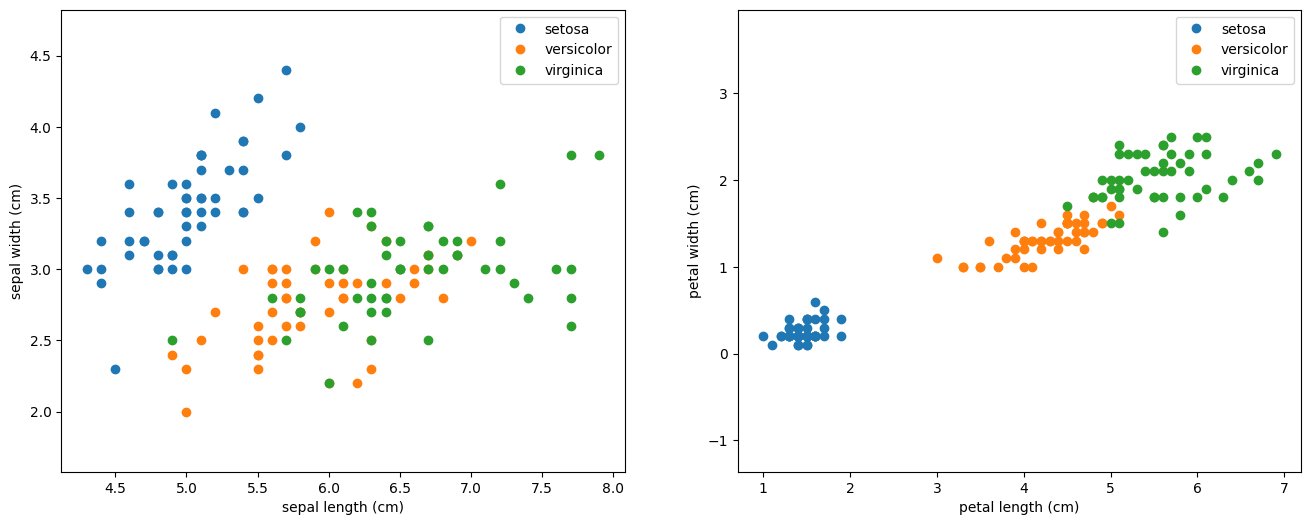

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 170.49it/s]


# Plot training progress

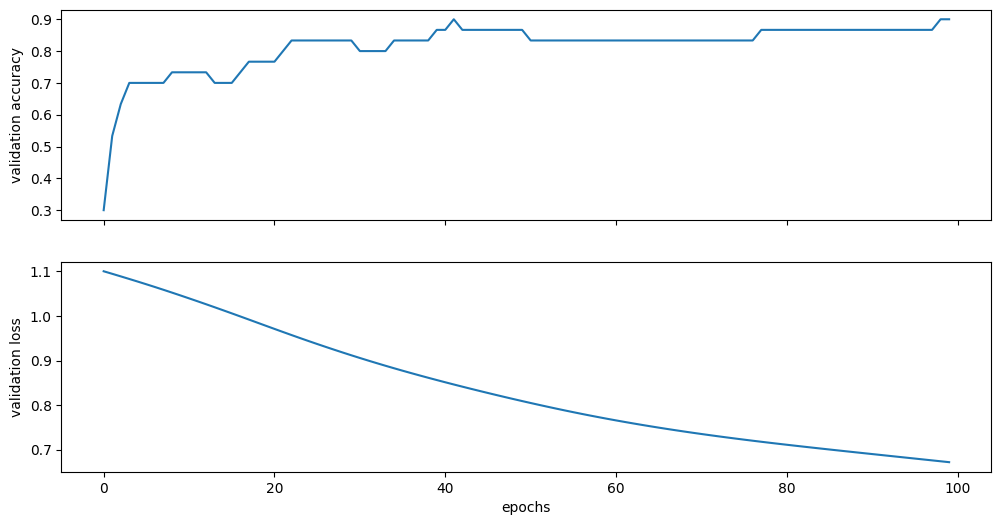

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?


--- Experiment 1: Changing the number of hidden layers ---

Training with 1 Hidden Layer:


100%|██████████| 100/100 [00:00<00:00, 183.09it/s]



Training with 3 Hidden Layers:


100%|██████████| 100/100 [00:00<00:00, 207.68it/s]



--- Experiment 2: Changing the number of neurons in the hidden layer ---

Training with 10 Neurons:


100%|██████████| 100/100 [00:00<00:00, 464.44it/s]



Training with 100 Neurons:


100%|██████████| 100/100 [00:00<00:00, 293.71it/s]



--- Experiment 3: Using a different activation function (Tanh) ---

Training with Tanh Activation:


100%|██████████| 100/100 [00:00<00:00, 237.00it/s]


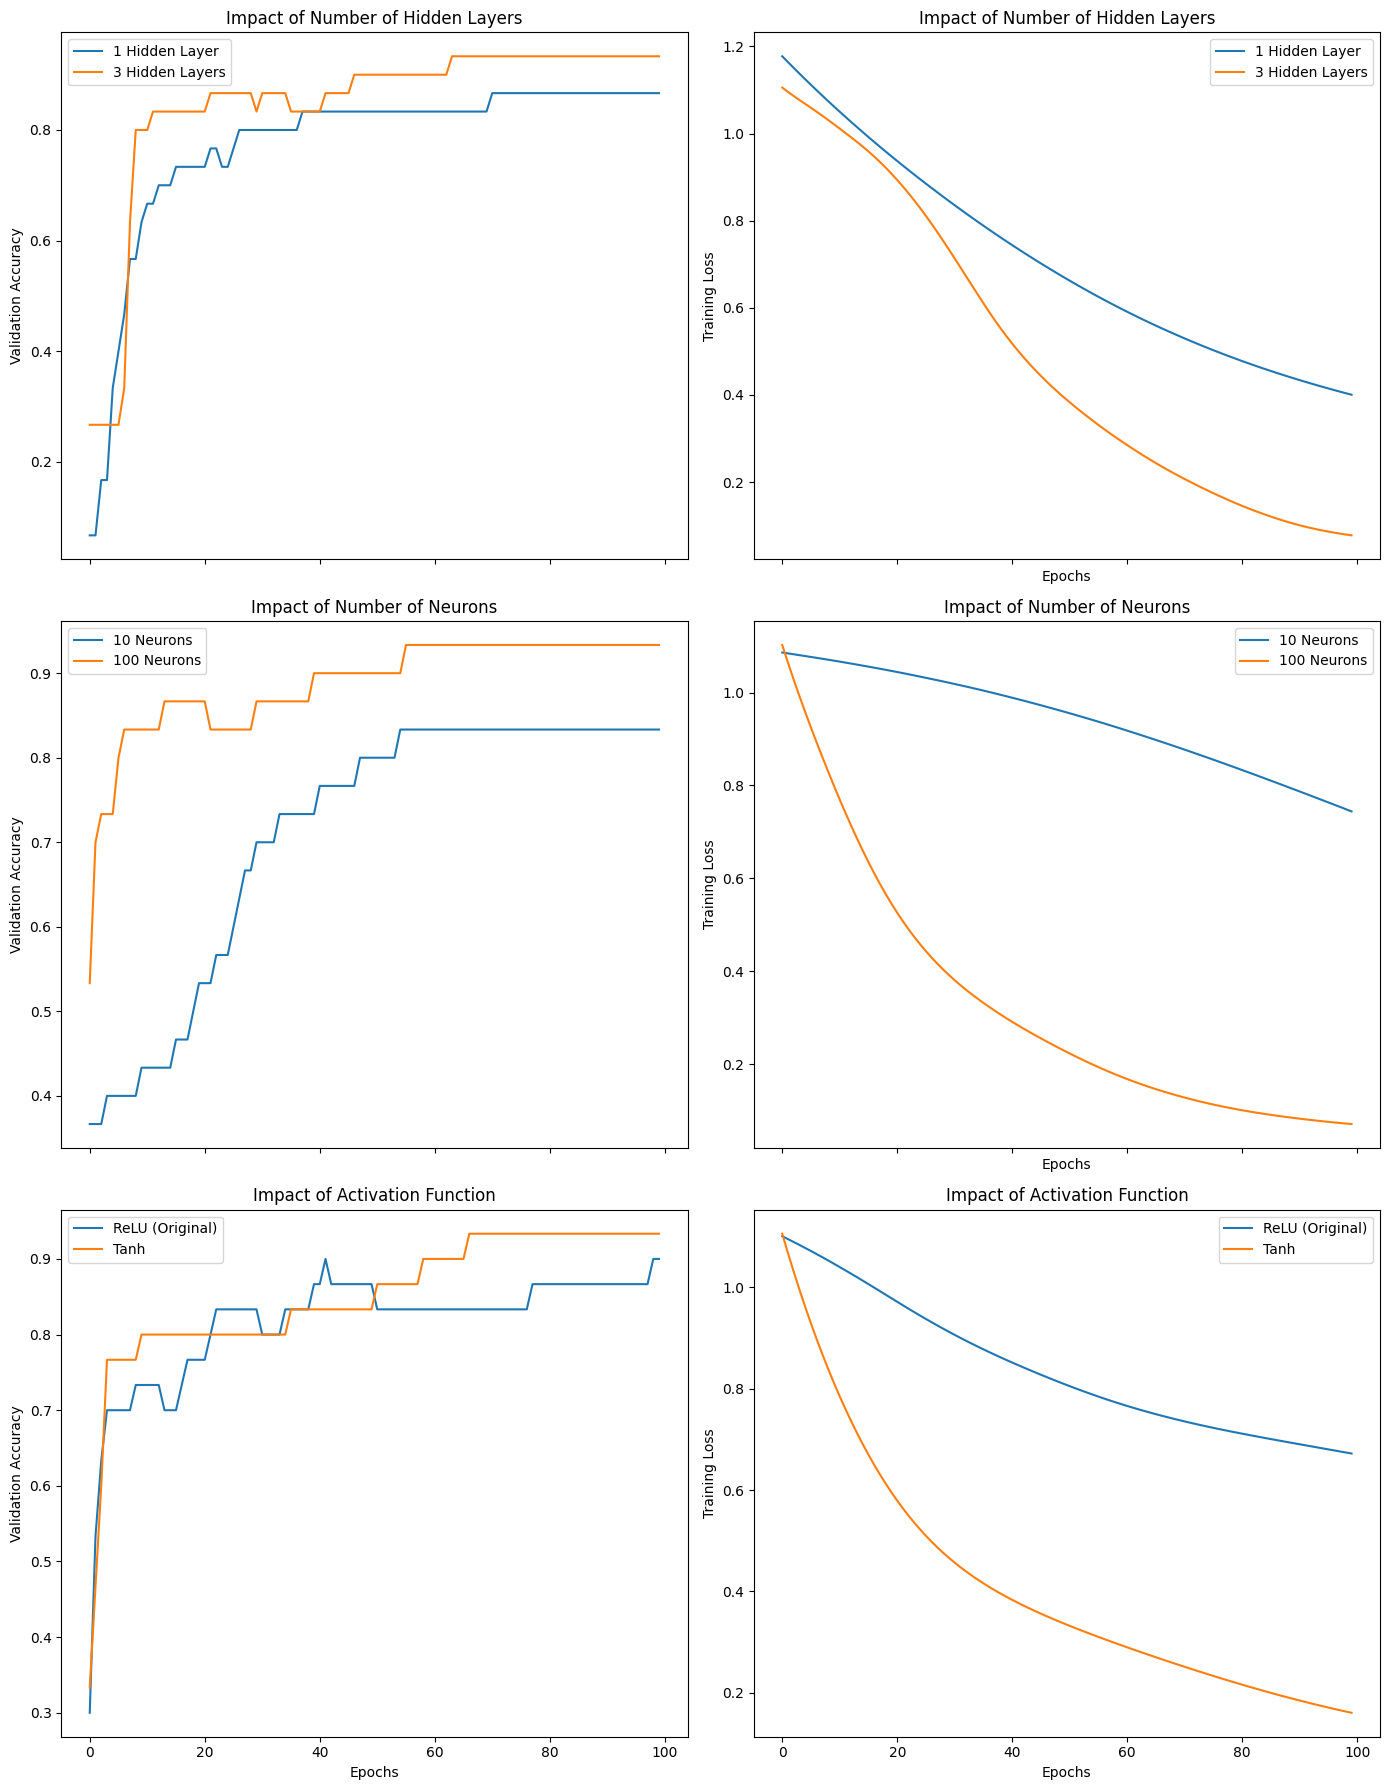

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import tqdm

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

X_train_tensor = torch.from_numpy(X_train).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_train_tensor = torch.from_numpy(y_train).long()
y_test_tensor = torch.from_numpy(y_test).long()

EPOCHS = 100

# --- Experiment 1: Changing the number of hidden layers ---
print("\n--- Experiment 1: Changing the number of hidden layers ---")

class ModelHiddenLayers(nn.Module):
    def __init__(self, input_dim, num_hidden_layers, hidden_dim):
        super(ModelHiddenLayers, self).__init__()
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_dim, hidden_dim))
        for _ in range(num_hidden_layers - 1):
            self.layers.append(nn.Linear(hidden_dim, hidden_dim))
        self.layers.append(nn.Linear(hidden_dim, 3))

    def forward(self, x):
        for i, layer in enumerate(self.layers):
            x = layer(x)
            if i < len(self.layers) - 1:
                x = F.relu(x)
        return x

# Train with 1 hidden layer
model_1_layer = ModelHiddenLayers(X_train.shape[1], 1, 50)
optimizer_1_layer = optim.Adam(model_1_layer.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
loss_list_1_layer = np.zeros((EPOCHS,))
accuracy_list_1_layer = np.zeros((EPOCHS,))
print("\nTraining with 1 Hidden Layer:")
for epoch in tqdm.trange(EPOCHS):
    y_pred = model_1_layer(X_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)
    loss_list_1_layer[epoch] = loss.item()
    optimizer_1_layer.zero_grad()
    loss.backward()
    optimizer_1_layer.step()
    with torch.no_grad():
        y_pred_test = model_1_layer(X_test_tensor)
        correct = (torch.argmax(y_pred_test, dim=1) == y_test_tensor).type(torch.FloatTensor)
        accuracy_list_1_layer[epoch] = correct.mean()

# Train with 3 hidden layers
model_3_layers = ModelHiddenLayers(X_train.shape[1], 3, 50)
optimizer_3_layers = optim.Adam(model_3_layers.parameters(), lr=0.001)
loss_list_3_layers = np.zeros((EPOCHS,))
accuracy_list_3_layers = np.zeros((EPOCHS,))
print("\nTraining with 3 Hidden Layers:")
for epoch in tqdm.trange(EPOCHS):
    y_pred = model_3_layers(X_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)
    loss_list_3_layers[epoch] = loss.item()
    optimizer_3_layers.zero_grad()
    loss.backward()
    optimizer_3_layers.step()
    with torch.no_grad():
        y_pred_test = model_3_layers(X_test_tensor)
        correct = (torch.argmax(y_pred_test, dim=1) == y_test_tensor).type(torch.FloatTensor)
        accuracy_list_3_layers[epoch] = correct.mean()

# --- Experiment 2: Changing the number of neurons in the hidden layer ---
print("\n--- Experiment 2: Changing the number of neurons in the hidden layer ---")

class ModelNeurons(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(ModelNeurons, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.layer3 = nn.Linear(hidden_dim, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.layer3(x)
        return x

# Train with 10 neurons
model_10_neurons = ModelNeurons(X_train.shape[1], 10)
optimizer_10_neurons = optim.Adam(model_10_neurons.parameters(), lr=0.001)
loss_list_10_neurons = np.zeros((EPOCHS,))
accuracy_list_10_neurons = np.zeros((EPOCHS,))
print("\nTraining with 10 Neurons:")
for epoch in tqdm.trange(EPOCHS):
    y_pred = model_10_neurons(X_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)
    loss_list_10_neurons[epoch] = loss.item()
    optimizer_10_neurons.zero_grad()
    loss.backward()
    optimizer_10_neurons.step()
    with torch.no_grad():
        y_pred_test = model_10_neurons(X_test_tensor)
        correct = (torch.argmax(y_pred_test, dim=1) == y_test_tensor).type(torch.FloatTensor)
        accuracy_list_10_neurons[epoch] = correct.mean()

# Train with 100 neurons
model_100_neurons = ModelNeurons(X_train.shape[1], 100)
optimizer_100_neurons = optim.Adam(model_100_neurons.parameters(), lr=0.001)
loss_list_100_neurons = np.zeros((EPOCHS,))
accuracy_list_100_neurons = np.zeros((EPOCHS,))
print("\nTraining with 100 Neurons:")
for epoch in tqdm.trange(EPOCHS):
    y_pred = model_100_neurons(X_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)
    loss_list_100_neurons[epoch] = loss.item()
    optimizer_100_neurons.zero_grad()
    loss.backward()
    optimizer_100_neurons.step()
    with torch.no_grad():
        y_pred_test = model_100_neurons(X_test_tensor)
        correct = (torch.argmax(y_pred_test, dim=1) == y_test_tensor).type(torch.FloatTensor)
        accuracy_list_100_neurons[epoch] = correct.mean()

# --- Experiment 3: Using a different activation function (Tanh) ---
print("\n--- Experiment 3: Using a different activation function (Tanh) ---")

class ModelTanh(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(ModelTanh, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.layer3 = nn.Linear(hidden_dim, 3)

    def forward(self, x):
        x = torch.tanh(self.layer1(x))
        x = torch.tanh(self.layer2(x))
        x = self.layer3(x)
        return x

model_tanh = ModelTanh(X_train.shape[1], 50)
optimizer_tanh = optim.Adam(model_tanh.parameters(), lr=0.001)
loss_list_tanh = np.zeros((EPOCHS,))
accuracy_list_tanh = np.zeros((EPOCHS,))
print("\nTraining with Tanh Activation:")
for epoch in tqdm.trange(EPOCHS):
    y_pred = model_tanh(X_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)
    loss_list_tanh[epoch] = loss.item()
    optimizer_tanh.zero_grad()
    loss.backward()
    optimizer_tanh.step()
    with torch.no_grad():
        y_pred_test = model_tanh(X_test_tensor)
        correct = (torch.argmax(y_pred_test, dim=1) == y_test_tensor).type(torch.FloatTensor)
        accuracy_list_tanh[epoch] = correct.mean()

# --- Plotting the results ---
fig, axs = plt.subplots(3, 2, figsize=(14, 18), sharex=True)

# Plotting Hidden Layers Experiment
axs[0, 0].plot(accuracy_list_1_layer, label='1 Hidden Layer')
axs[0, 0].plot(accuracy_list_3_layers, label='3 Hidden Layers')
axs[0, 0].set_ylabel("Validation Accuracy")
axs[0, 0].set_title("Impact of Number of Hidden Layers")
axs[0, 0].legend()

axs[0, 1].plot(loss_list_1_layer, label='1 Hidden Layer')
axs[0, 1].plot(loss_list_3_layers, label='3 Hidden Layers')
axs[0, 1].set_ylabel("Training Loss")
axs[0, 1].set_xlabel("Epochs")
axs[0, 1].set_title("Impact of Number of Hidden Layers")
axs[0, 1].legend()

# Plotting Neurons Experiment
axs[1, 0].plot(accuracy_list_10_neurons, label='10 Neurons')
axs[1, 0].plot(accuracy_list_100_neurons, label='100 Neurons')
axs[1, 0].set_ylabel("Validation Accuracy")
axs[1, 0].set_title("Impact of Number of Neurons")
axs[1, 0].legend()

axs[1, 1].plot(loss_list_10_neurons, label='10 Neurons')
axs[1, 1].plot(loss_list_100_neurons, label='100 Neurons')
axs[1, 1].set_ylabel("Training Loss")
axs[1, 1].set_xlabel("Epochs")
axs[1, 1].set_title("Impact of Number of Neurons")
axs[1, 1].legend()

# Plotting Activation Function Experiment
axs[2, 0].plot(accuracy_list, label='ReLU (Original)')
axs[2, 0].plot(accuracy_list_tanh, label='Tanh')
axs[2, 0].set_ylabel("Validation Accuracy")
axs[2, 0].set_xlabel("Epochs")
axs[2, 0].set_title("Impact of Activation Function")
axs[2, 0].legend()

axs[2, 1].plot(loss_list, label='ReLU (Original)')
axs[2, 1].plot(loss_list_tanh, label='Tanh')
axs[2, 1].set_ylabel("Training Loss")
axs[2, 1].set_xlabel("Epochs")
axs[2, 1].set_title("Impact of Activation Function")
axs[2, 1].legend()

plt.tight_layout()
plt.show()

Experimenting with MLP architecture reveals key performance trade-offs. More hidden layers and neurons can increase model capacity, potentially improving accuracy but also raising the risk of overfitting and longer training. Different activation functions like Tanh can influence convergence speed and final accuracy compared to ReLU, which is simpler but can suffer from vanishing gradients or dead neurons. Observing training loss and validation accuracy curves for each architectural change helps determine the most suitable design for the given task and dataset.